In [ ]:
import pandas as pd
import re

In [ ]:
oil_news=pd.read_csv('oil_review_unclean.csv')
oil_news.head()

,Unnamed: 0,Reviews
0,0,MARKET NEWS
1,1,Crude oil retreats from multi-year highs after...
2,2,Crude oil prices retreat after touching fresh ...
3,3,Saudi Aramco hits $2 trillion valuation on bac...
4,4,"Crude oil above Rs 5,800 a barrel, highest sin..."


In [ ]:
oil_news.shape

(54, 2)

In [ ]:
def cleantext(text):
    text = text.lower()
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text

# Clean The Text
oil_news["Reviews"] = oil_news["Reviews"].apply(cleantext)

oil_news.head()

,Unnamed: 0,Reviews
0,0,market news
1,1,crude oil retreats from multi-year highs after...
2,2,crude oil prices retreat after touching fresh ...
3,3,saudi aramco hits $2 trillion valuation on bac...
4,4,"crude oil above rs 5,800 a barrel, highest sin..."


In [ ]:
# The polarity is a value ranging between -1 and 1, with -1 being very negative and +1 very positive
# The subjectivity ranges between 0 and 1, and refers to the person’s opinion, emotion, or even judgment.
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Reviews"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
oil_news[["subjectivity", "polarity"]] = oil_news.apply(sentiment_analysis, axis=1)

oil_news.head(10)

,Unnamed: 0,Reviews,subjectivity,polarity
0,0,market news,0.000,0.000
1,1,crude oil retreats from multi-year highs after...,1.000,-0.700
2,2,crude oil prices retreat after touching fresh ...,0.635,0.065
3,3,saudi aramco hits $2 trillion valuation on bac...,0.250,0.125
4,4,"crude oil above rs 5,800 a barrel, highest sin...",0.550,-0.350
5,5,moneycontrol pro panorama | oil prices heat up...,0.000,0.000
6,6,"crude oil prices rise on high demand, dollar d...",0.770,-0.270
7,7,opec+ seen keeping oil output policy unchanged...,0.000,0.000
8,8,lex | oil prices: opec+ will open taps before ...,0.750,0.000
9,9,a perfect storm in the energy sector,1.000,1.000


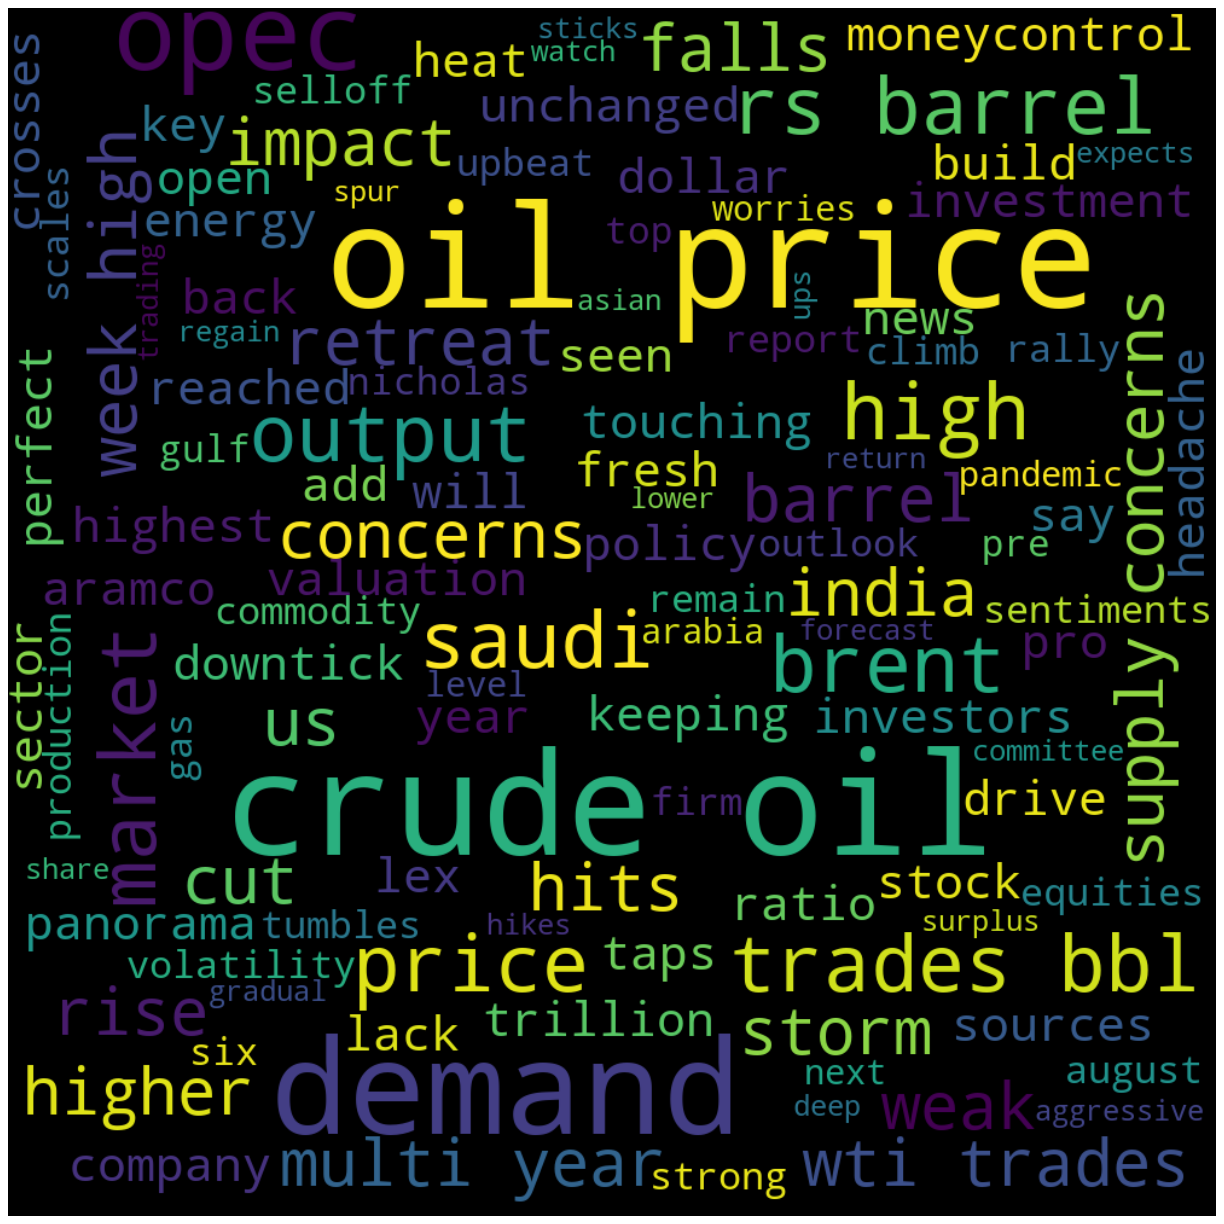

In [ ]:
# Creating WordCloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([news for news in oil_news["Reviews"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
oil_news["analysis"] = oil_news["polarity"].apply(analysis)
# Print The Data
oil_news.head(10)

,Unnamed: 0,Reviews,subjectivity,polarity,analysis
0,0,market news,0.000,0.000,Neutral
1,1,crude oil retreats from multi-year highs after...,1.000,-0.700,Negative
2,2,crude oil prices retreat after touching fresh ...,0.635,0.065,Positive
3,3,saudi aramco hits $2 trillion valuation on bac...,0.250,0.125,Positive
4,4,"crude oil above rs 5,800 a barrel, highest sin...",0.550,-0.350,Negative
5,5,moneycontrol pro panorama | oil prices heat up...,0.000,0.000,Neutral
6,6,"crude oil prices rise on high demand, dollar d...",0.770,-0.270,Negative
7,7,opec+ seen keeping oil output policy unchanged...,0.000,0.000,Neutral
8,8,lex | oil prices: opec+ will open taps before ...,0.750,0.000,Neutral
9,9,a perfect storm in the energy sector,1.000,1.000,Positive


In [ ]:
positive_news = oil_news[oil_news['analysis'] == 'Positive']
negative_news = oil_news[oil_news['analysis'] == 'Negative']

print('positive news')
for i, row in positive_news[:5].iterrows():
  print(' -' + row['Reviews'])

print('negative news')
for i, row in negative_news[:5].iterrows():
  print(' -' + row['Reviews'])

positive news
 -crude oil prices retreat after touching fresh 52 week high of rs 5,956/barrel
 -saudi aramco hits $2 trillion valuation on back of higher oil prices
 -a perfect storm in the energy sector 
 -lack of investment, more demand to drive oil price volatility: report
 -oil scales six-week high as storm nicholas hits us gulf
negative news
 -crude oil retreats from multi-year highs after us stock build
 -crude oil above rs 5,800 a barrel, highest since 2014
 -crude oil prices rise on high demand, dollar downtick; brent crosses $81 a barrel
 -crude oil at multi-year high; what’s the impact on india?
 -crude oil prices climb above rs 5,500/barrel on firm demand, supply concerns; brent trades above $78/bbl
